<a href="https://colab.research.google.com/github/estefanabermeo/RegresionNoLineal_RegresionLogistica/blob/main/A7_1_Gastos2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD 7.1 REGRESIÓN NO LINEAL - GASTOS 2O2O**
EQUIPO 10:
* Estefana Bermeo Severiano - A01367558
* Miguel Saúl Fernández Ávalos - A01707491
* Mariel Quetzali Fernández Montes - A0170779
* Christian Jesús Soto-Vieyra Gil - A01707759

---

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
# Leemos el archivo ya limpio
gastos20 = pd.read_csv("gastos2020_limpio.csv")
gastos20.head(5)

,Unnamed: 0,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,--,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,--,14051.72
1,1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,--,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,--,0.00
2,2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,--,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,--,0.00
3,3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,--,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,--,0.00
4,4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,--,Pago,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,--,0.00


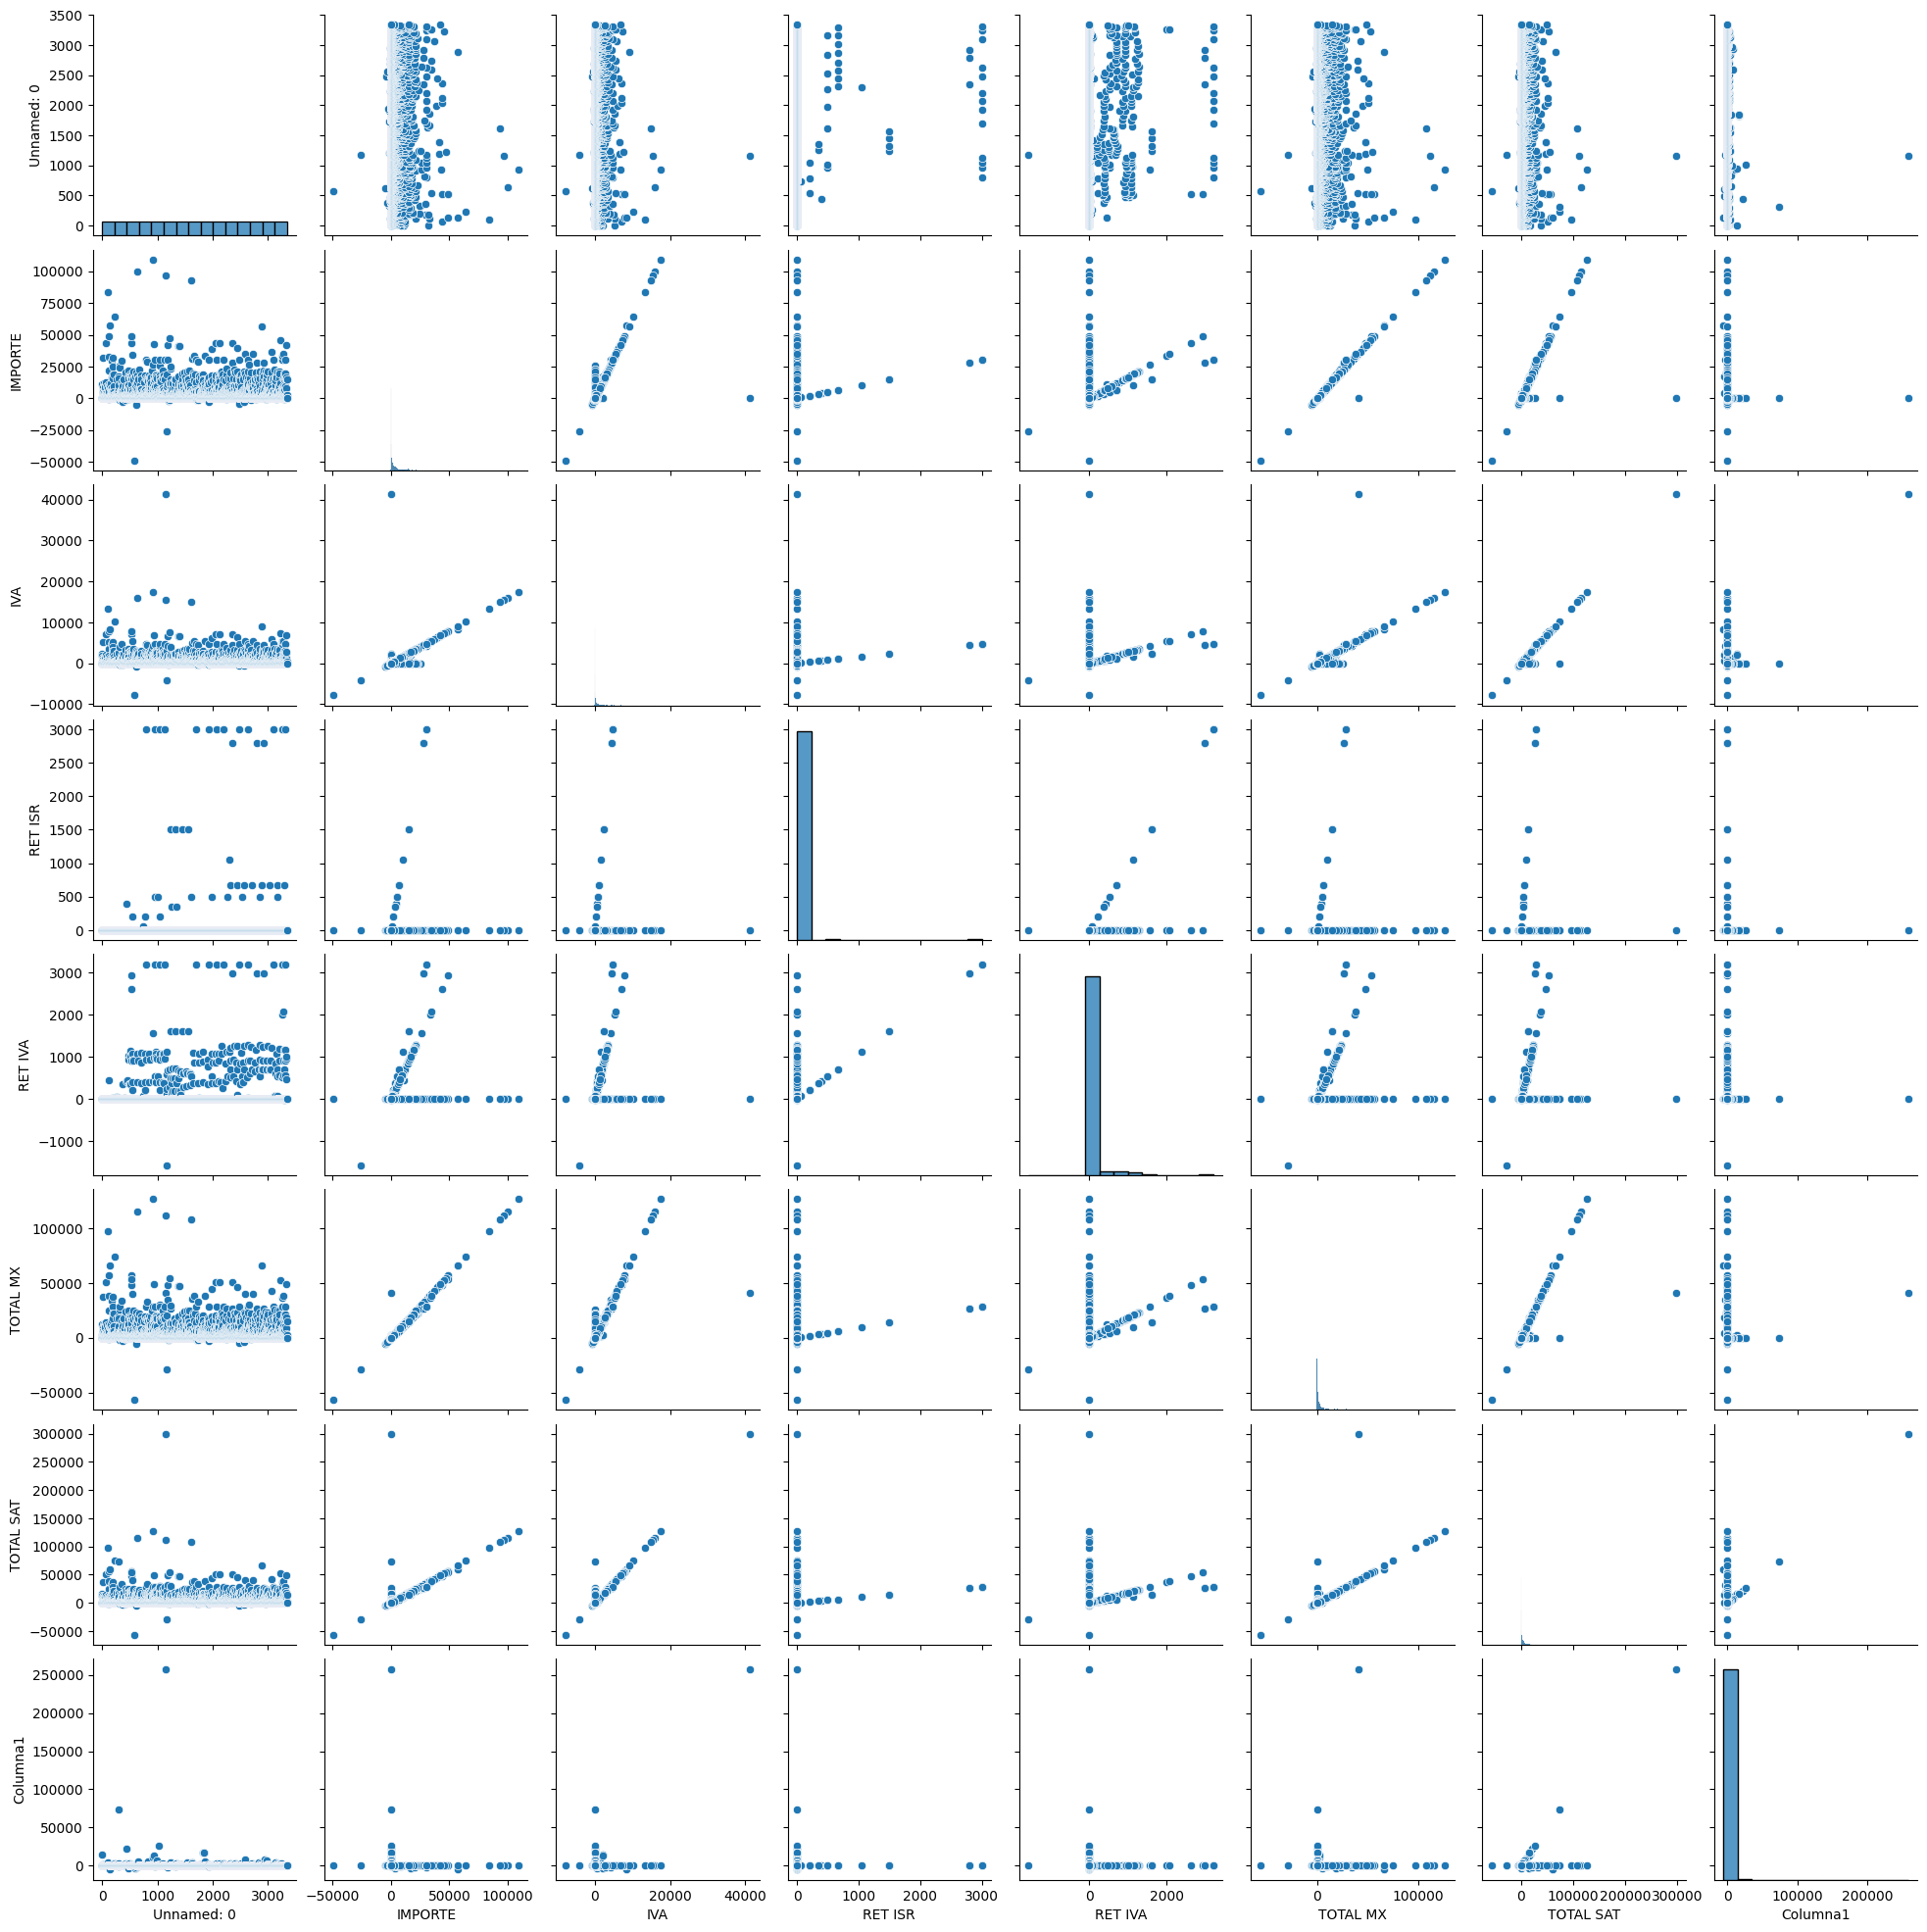

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(gastos20)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gastos20[['IVA']]
Var_Dep= gastos20['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

**MODELO 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, gastos20['IVA'], gastos20['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.58751482e-04,  8.02350810e+00,  7.56486296e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, gastos20['IVA'], gastos20['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,17244.206547
1,635.632123
2,257.743781
3,13271.637347
4,7.564863
...,...
3337,169.655121
3338,2919.502945
3339,217.751954
3340,7.564863


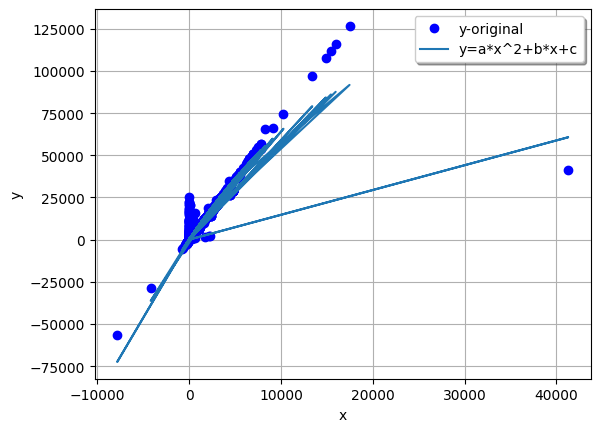

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.9331579819188499

**MODELO 2**

In [ ]:
def  func2 (x, a, b, c):
     return a*x**3 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, gastos20['IVA'], gastos20['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-3.64563803e-09,  7.29752803e+00,  1.42702319e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, gastos20['IVA'], gastos20['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros[ 2 ]
yfit2 = a2 * x ** 3 + b2 * x + c2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit2 = yfit2.reshape(51, 1)
yfit2

,IVA
0,16373.020248
1,579.689304
2,235.247627
3,12475.955605
4,7.564863
...,...
3337,155.047874
3338,2675.144076
3339,198.833007
3340,7.564863


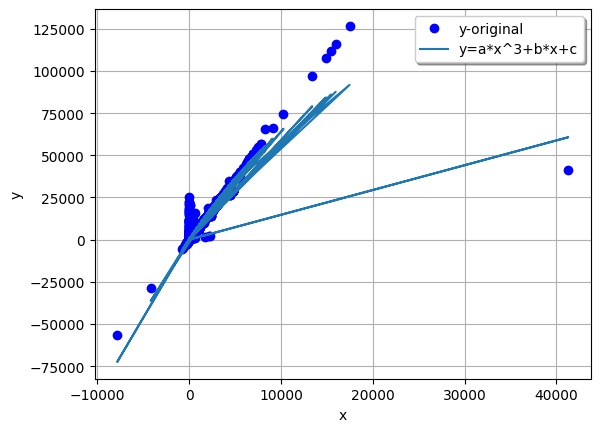

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^3+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit2) 
R2

0.9514250913495472